#### 사전준비

In [1]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mbl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글/차트 마이너스 깨짐현상 해결/ seaborn 한글설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

#### 패션 MNIST 데이터

##### 데이터 로드

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = load_data()

#### 정규화

In [5]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
train_scaled = train_input / 255.0 # 0~1 실수값 변경

In [7]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,
train_target, test_size=0.2, random_state=42)

In [8]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


#### 모델생성 함수

In [17]:
def model_fn(a_layer=None):
    model = keras.Sequential(name='model_fn_MakeModel')
    model.add(keras.layers.Flatten(input_shape=(28,28)))  # 2차원 입력값을 1차원으로
    model.add(keras.layers.Dense(100, activation='relu', name='hidden'))

    if a_layer:
        model.add(a_layer)

    model.add(keras.layers.Dense(10, activation='softmax', name='output'))

    return model

In [18]:
# 함수 사용예
model = model_fn(keras.layers.Dense(100, activation='relu', name='hidden2'))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


#### 손실곡선, 정확도

In [30]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose = 2)
#  verbose 매개변수는 훈련 과정 출력 조절
# 기본값은 1로 이전 절에서처럼 에포크마다 진행 막대와 함께 손실 등의 지표가 출력

Epoch 1/5
1500/1500 - 3s - loss: 0.2807 - accuracy: 0.9077 - 3s/epoch - 2ms/step
Epoch 2/5
1500/1500 - 2s - loss: 0.2751 - accuracy: 0.9080 - 2s/epoch - 2ms/step
Epoch 3/5
1500/1500 - 2s - loss: 0.2680 - accuracy: 0.9094 - 2s/epoch - 2ms/step
Epoch 4/5
1500/1500 - 3s - loss: 0.2731 - accuracy: 0.9099 - 3s/epoch - 2ms/step
Epoch 5/5
1500/1500 - 3s - loss: 0.2713 - accuracy: 0.9116 - 3s/epoch - 2ms/step


In [31]:
history.history

{'loss': [0.2807152569293976,
  0.2751044034957886,
  0.26803529262542725,
  0.2731335461139679,
  0.27132245898246765],
 'accuracy': [0.9076666831970215,
  0.9079999923706055,
  0.9093541502952576,
  0.9099166393280029,
  0.9115625023841858]}

#### 손실곡선 차트

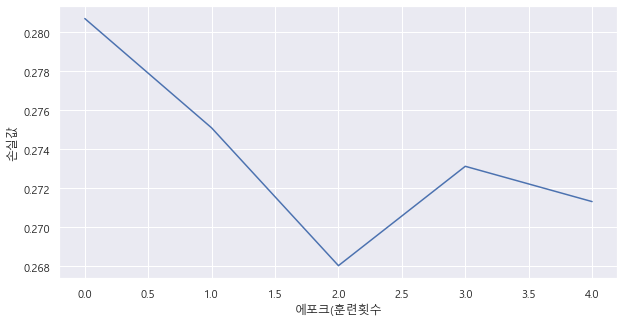

In [32]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.xlabel('에포크(훈련횟수')
plt.ylabel('손실값')
plt.show()

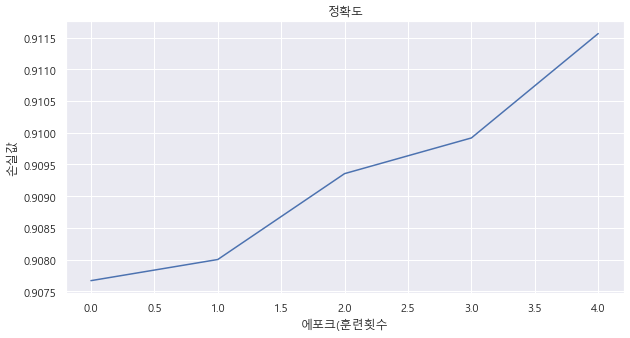

In [33]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.title('정확도')
plt.xlabel('에포크(훈련횟수')
plt.ylabel('손실값')
plt.show()

#### 에포크 20번 훈련

In [39]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5360 - accuracy: 0.8095
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3932 - accuracy: 0.8583
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3559 - accuracy: 0.8724
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3328 - accuracy: 0.8798
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3198 - accuracy: 0.8867
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3077 - accuracy: 0.8906
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2996 - accuracy: 0.8951
Epoch 8/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2872 - accuracy: 0.8984
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2827 - accuracy: 0.9004
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.276

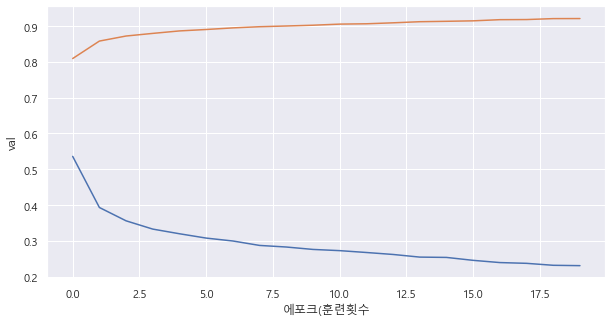

In [40]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
# plt.title('정확도')
plt.xlabel('에포크(훈련횟수')
plt.ylabel('val')
plt.show()

#### 검증손실

훈련세트 훈련 -> 정확도 92%

In [45]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                                validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5313 - accuracy: 0.8118 - val_loss: 0.4318 - val_accuracy: 0.8437
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3932 - accuracy: 0.8593 - val_loss: 0.3963 - val_accuracy: 0.8612
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3564 - accuracy: 0.8719 - val_loss: 0.3817 - val_accuracy: 0.8643
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3342 - accuracy: 0.8809 - val_loss: 0.3724 - val_accuracy: 0.8744
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3194 - accuracy: 0.8860 - val_loss: 0.3558 - val_accuracy: 0.8789
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3084 - accuracy: 0.8913 - val_loss: 0.3824 - val_accuracy: 0.8796
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2976 - accuracy: 0.8955 - val_loss: 0.3728 - val_accuracy:

In [46]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

##### 훈련세트/ 검증세트 비교

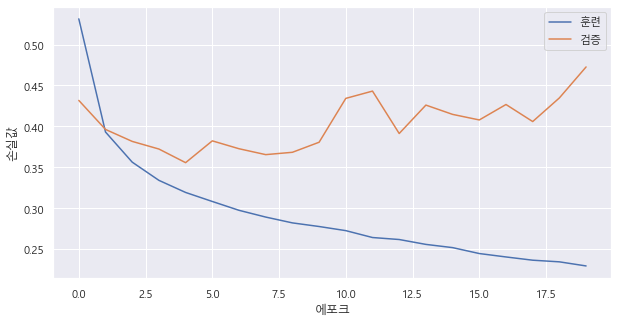

In [47]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()
# 검증세트에 맞게 훈련이 안됨

#### 드롭아웃

In [48]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()
# 100개 그대로 넘어감

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [50]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                                validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5922 - accuracy: 0.7908 - val_loss: 0.4204 - val_accuracy: 0.8481
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4527 - accuracy: 0.8389 - val_loss: 0.4095 - val_accuracy: 0.8512
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4242 - accuracy: 0.8512 - val_loss: 0.3828 - val_accuracy: 0.8628
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4156 - accuracy: 0.8570 - val_loss: 0.4020 - val_accuracy: 0.8609
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4030 - accuracy: 0.8626 - val_loss: 0.3820 - val_accuracy: 0.8733
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3959 - accuracy: 0.8662 - val_loss: 0.3949 - val_accuracy: 0.8671
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3962 - accuracy: 0.8670 - val_loss: 0.3944 - val_accuracy:

In [52]:
from pickletools import optimize

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20,
                                validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5299 - accuracy: 0.8142 - val_loss: 0.4189 - val_accuracy: 0.8515
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3968 - accuracy: 0.8587 - val_loss: 0.4014 - val_accuracy: 0.8551
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3539 - accuracy: 0.8731 - val_loss: 0.3778 - val_accuracy: 0.8672
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3262 - accuracy: 0.8820 - val_loss: 0.3654 - val_accuracy: 0.8668
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3051 - accuracy: 0.8880 - val_loss: 0.3398 - val_accuracy: 0.8822
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2917 - accuracy: 0.8929 - val_loss: 0.3702 - val_accuracy: 0.8652
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2796 - accuracy: 0.8972 - val_loss: 0.3305 - val_accuracy:

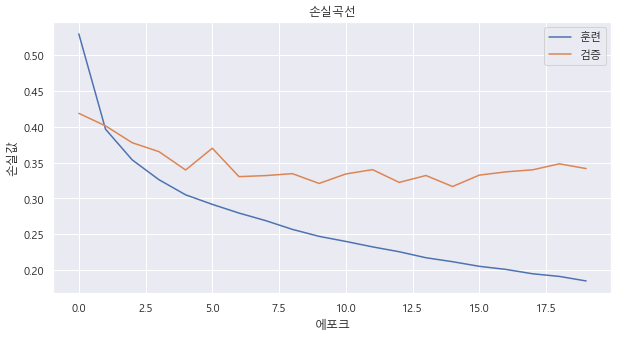

In [53]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()
# 검증세트에 맞게 훈련이 안됨

#### 모델 저장/로드

In [ ]:
model.save_weights('model-weights.h5')
model.load_weights('model-weights.h5')

model.save('model-whole.h5')
model=keras.models.load_model('model-')

In [54]:
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [56]:
# 훈련된 가중치만 저장
model.save_weights('./data/model-weights.h5')

In [57]:
# 훈련된 전체데이터 저장
model.save('./data/model.h5')

##### 가중치 모델 로드

In [74]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('./data/model-weights.h5')
# 프레딕트한 모델 보겠다

In [75]:
# 가중치만 불러왔기에 안됨..실제 전체모델 로드 필요
model.evaluate(val_scaled, val_target)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

#### 전체모델 로드

In [60]:
model = keras.models.load_model('./data/model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3417 - accuracy: 0.8866


[0.34172913432121277, 0.8865833282470703]

가중치만 저장하면 모델 기능 제약있음. 모델 전체 데이터저장하면 모든 기능 수행

In [61]:
model.predict(val_scaled)

375/375 [==============================] - 1s 1ms/step


array([[1.77003152e-11, 9.36553163e-18, 3.54779171e-18, ...,
        2.52195536e-13, 1.00000000e+00, 1.92868663e-19],
       [2.05310682e-12, 3.76754134e-17, 1.19244954e-16, ...,
        3.49051584e-15, 1.00000000e+00, 8.84710528e-18],
       [1.69703019e-11, 1.94672272e-16, 1.58683689e-12, ...,
        9.99998689e-01, 1.02696206e-10, 4.43345840e-08],
       ...,
       [6.11279083e-10, 4.95417448e-16, 3.46581930e-10, ...,
        1.00280495e-09, 9.99999881e-01, 7.76151929e-13],
       [1.07180141e-13, 3.82905783e-19, 3.28693369e-18, ...,
        8.51314964e-17, 1.00000000e+00, 9.72791387e-19],
       [2.30485126e-01, 9.04486228e-08, 2.52799829e-04, ...,
        2.51194485e-03, 4.47075627e-06, 1.73507780e-01]], dtype=float32)

In [64]:
### 예측결과
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels==val_target)

375/375 [==============================] - 1s 1ms/step


0.8865833333333333

In [66]:
val_labels

array([8, 8, 7, ..., 8, 8, 6], dtype=int64)

#### 콜백 Callback

In [69]:
from gc import callbacks
from tabnanny import check, verbose


model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
# 베스트 모델을 저장할 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target),
                callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5960 - accuracy: 0.7927 - val_loss: 0.4790 - val_accuracy: 0.8230
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4404 - accuracy: 0.8412 - val_loss: 0.3878 - val_accuracy: 0.8603
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4065 - accuracy: 0.8512 - val_loss: 0.3714 - val_accuracy: 0.8659
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3823 - accuracy: 0.8609 - val_loss: 0.3620 - val_accuracy: 0.8677
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3660 - accuracy: 0.8678 - val_loss: 0.3498 - val_accuracy: 0.8731
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3532 - accuracy: 0.8708 - val_loss: 0.3390 - val_accuracy: 0.8765
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3440 - accuracy: 0.8735 - val_loss: 0.3404 - val_accuracy:

In [70]:
# 체크포인트 확인
model = keras.models.load_model('./data/best_model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3295 - accuracy: 0.8849


[0.3295224606990814, 0.8849166631698608]

#### 조기종료

In [102]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
# 베스트 모델을 저장할 콜백
# save_best_only=True 가장 좋은 모델 저장됨
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model2.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target),
                               callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1479/1500 [============================>.] - ETA: 0s - loss: 0.5912 - accuracy: 0.7923
Epoch 1: val_loss improved from inf to 0.42508, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5897 - accuracy: 0.7928 - val_loss: 0.4251 - val_accuracy: 0.8484
Epoch 2/20
1472/1500 [============================>.] - ETA: 0s - loss: 0.4345 - accuracy: 0.8435
Epoch 2: val_loss improved from 0.42508 to 0.41185, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4347 - accuracy: 0.8435 - val_loss: 0.4119 - val_accuracy: 0.8454
Epoch 3/20
1483/1500 [============================>.] - ETA: 0s - loss: 0.4029 - accuracy: 0.8547
Epoch 3: val_loss improved from 0.41185 to 0.39806, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4039 - accuracy: 0.8543 - val_loss: 0.3981 - val_accuracy: 0.8542
Epoch 4/20
1494/1500 [===================

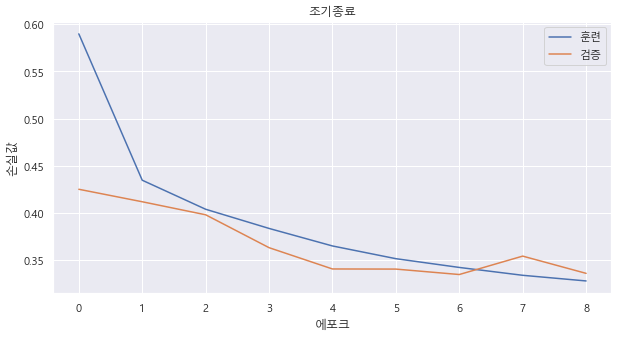

In [103]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('조기종료')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()
# 검증세트에 맞게 훈련이 안됨

In [104]:
# 어느 에포크에서 조기종료했는지 확인
early_stopping_cb.stopped_epoch # 8번째에서 멈춤(드랍아웃)

8

In [105]:
model.evaluate(val_scaled, val_target) # 10번째 에포크값

375/375 [==============================] - 1s 1ms/step - loss: 0.3348 - accuracy: 0.8789


[0.33479294180870056, 0.8789166808128357]

In [106]:
# 15번째 에포크에서 멈춤
model.save('./data/best_model15.h5')

#### 조기종료된 모델 저장값/ 체크포인트로 저장된 모델 저장값 비교

In [107]:
model_cp = keras.models.load_model('./data/best_model2.h5')
model_cp.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3348 - accuracy: 0.8789


[0.33479294180870056, 0.8789166808128357]

In [108]:
model_15 = keras.models.load_model('./data/best_model15.h5')
model_15.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3348 - accuracy: 0.8789


[0.33479294180870056, 0.8789166808128357]

In [109]:
model = keras.models.load_model('./data/best_model2.h5') # earlystopping으로 콜백된 모델
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3348 - accuracy: 0.8789


[0.33479294180870056, 0.8789166808128357]

In [115]:
### 예측결과
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels==val_target)

375/375 [==============================] - 0s 1ms/step


0.8789166666666667

In [116]:
### 예측결과
val_scaled[:10]

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.00784314, 0.        , 0.43921569, ..., 0.        ,
         0.        , 0.00392157],
        [0.00784314, 0.        , 0.08235294, ..., 0.        ,
         0.00392157, 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 